<a href="https://colab.research.google.com/github/kokochka/veggies-classifier/blob/main/veg_cls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [12]:
!pip install tensorflow


In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Визначаємо шляхи до моделі та тестових зображень
model_path = '/content/vegetable_classifier_epoch_30_val_acc_0.98.h5'
images_path = '/content/test'

In [15]:
# Завантаження натренованої моделі
model = load_model(model_path)

In [21]:
# Визначаємо класи згідно датасета
class_names = ['Bean', 'Bitter Gourd', 'Bottle Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

In [22]:
# Підготовка зображення
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

1/1 [==============================] - 0s 68ms/step
Prediction for flashlight.jpeg: [1.19370714e-04 8.91863601e-05 2.81409884e-04 1.48900377e-04
 6.39021280e-04 9.87491148e-05 6.63716719e-03 1.04786093e-04
 9.84080951e-04 1.53510773e-05 2.65203244e-06 4.79573896e-03
 1.08644599e-02 9.93861704e-07 9.75218117e-01]


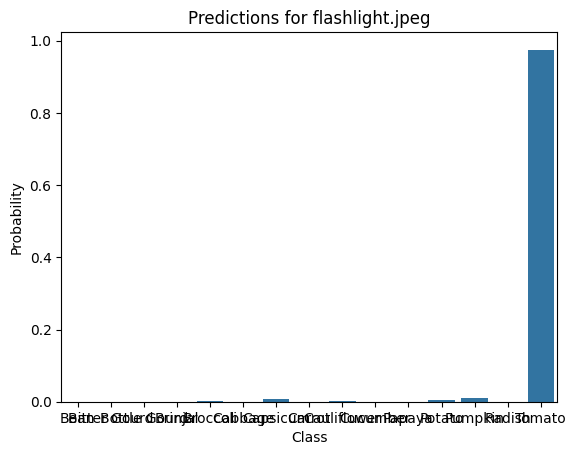

1/1 [==============================] - 0s 155ms/step
Prediction for cucu.jpeg: [9.9762988e-01 5.8308666e-05 2.7749543e-21 1.1052727e-18 6.2253857e-05
 2.9209018e-21 2.2494276e-03 8.1585043e-13 8.0453901e-09 4.7679899e-13
 1.2477117e-19 1.4295256e-13 2.8103742e-07 4.0397080e-13 1.9361881e-14]


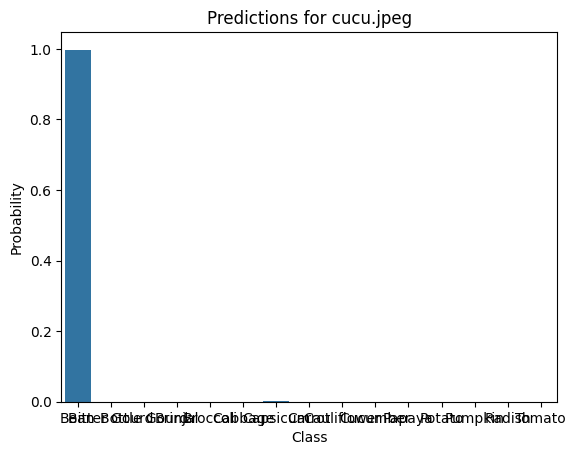

1/1 [==============================] - 0s 60ms/step
Prediction for pomidor.jpeg: [2.9572840e-16 1.9397252e-21 5.2055766e-18 1.8336449e-22 1.9230845e-18
 4.8309899e-23 7.1584245e-11 2.3929968e-02 7.3151095e-15 3.7586405e-20
 8.0639311e-20 9.8892469e-15 9.7516090e-01 1.8355896e-23 9.0917648e-04]


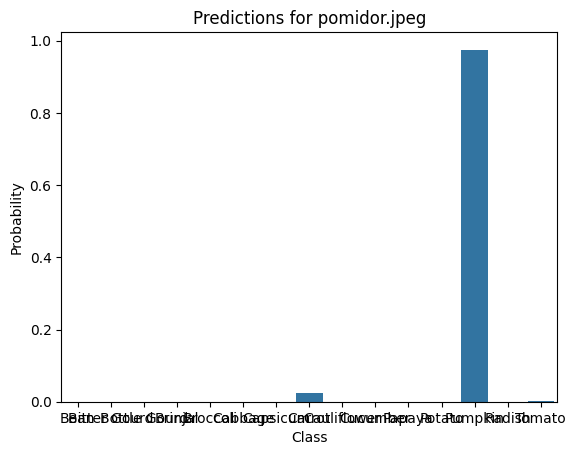

In [25]:
for img_name in os.listdir(images_path):
    img_path = os.path.join(images_path, img_name)
    img = load_and_preprocess_image(img_path)
    prediction = model.predict(img)[0]

    # Вивід передбачення для кожного зображення
    print(f'Prediction for {img_name}:', prediction)

    # Будуємо графік за допомогою seaborn
    sns.barplot(x=class_names, y=prediction)
    plt.title(f'Predictions for {img_name}')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.show()